# House Price Prediction

### Import all the libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Droping all the unnecessary Columns

In [7]:
data.drop(['id','date'],axis=1,inplace=True)
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Checking all data and their types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [10]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
data.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [12]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Data Preprocessing

In [14]:
# changing float to integer
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

# renaming the column yr_built to age and changing the values to age
data.rename(columns={'yr_built':'age'},inplace=True)
data['age'] = 2025 - data['age']

# changing the column yr_renovated to renovated and changing the values to 0 and 1
data.rename(columns={'yr_renovated':'renovated'},inplace=True)
data['renovated'] = data['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [15]:
# using simple feature scaling
data['sqft_living'] = data['sqft_living']/data['sqft_living'].max()

data['sqft_living15'] = data['sqft_living15']/data['sqft_living15'].max()

data['sqft_lot'] = data['sqft_lot']/data['sqft_lot'].max()

data['sqft_above'] = data['sqft_above']/data['sqft_above'].max()

data['sqft_basement'] = data['sqft_basement']/data['sqft_basement'].max()

data['sqft_lot15'] = data['sqft_lot15']/data['sqft_lot15'].max()

In [16]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,70,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,74,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,92,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,60,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,38,0,98074,47.6168,-122.045,0.289855,0.008612
5,1225000,4,4,0.400295,0.061725,1,0,0,3,11,0.413390,0.317427,24,0,98053,47.6561,-122.005,0.766506,0.117000
6,257500,3,2,0.126662,0.004129,2,0,0,3,7,0.182253,0.000000,30,0,98003,47.3097,-122.327,0.360386,0.007827
7,291850,3,1,0.078287,0.005881,1,0,0,3,7,0.112646,0.000000,62,0,98198,47.4095,-122.315,0.265700,0.011147
8,229500,3,1,0.131462,0.004524,1,0,0,3,7,0.111583,0.151452,65,0,98146,47.5123,-122.337,0.286634,0.009312
9,323000,3,2,0.139586,0.003972,2,0,0,3,7,0.200850,0.000000,22,0,98038,47.3684,-122.031,0.384863,0.008689


# Exploratory Data Analysis (EDA)

### Correlation Matrix to find the relationship between the variable

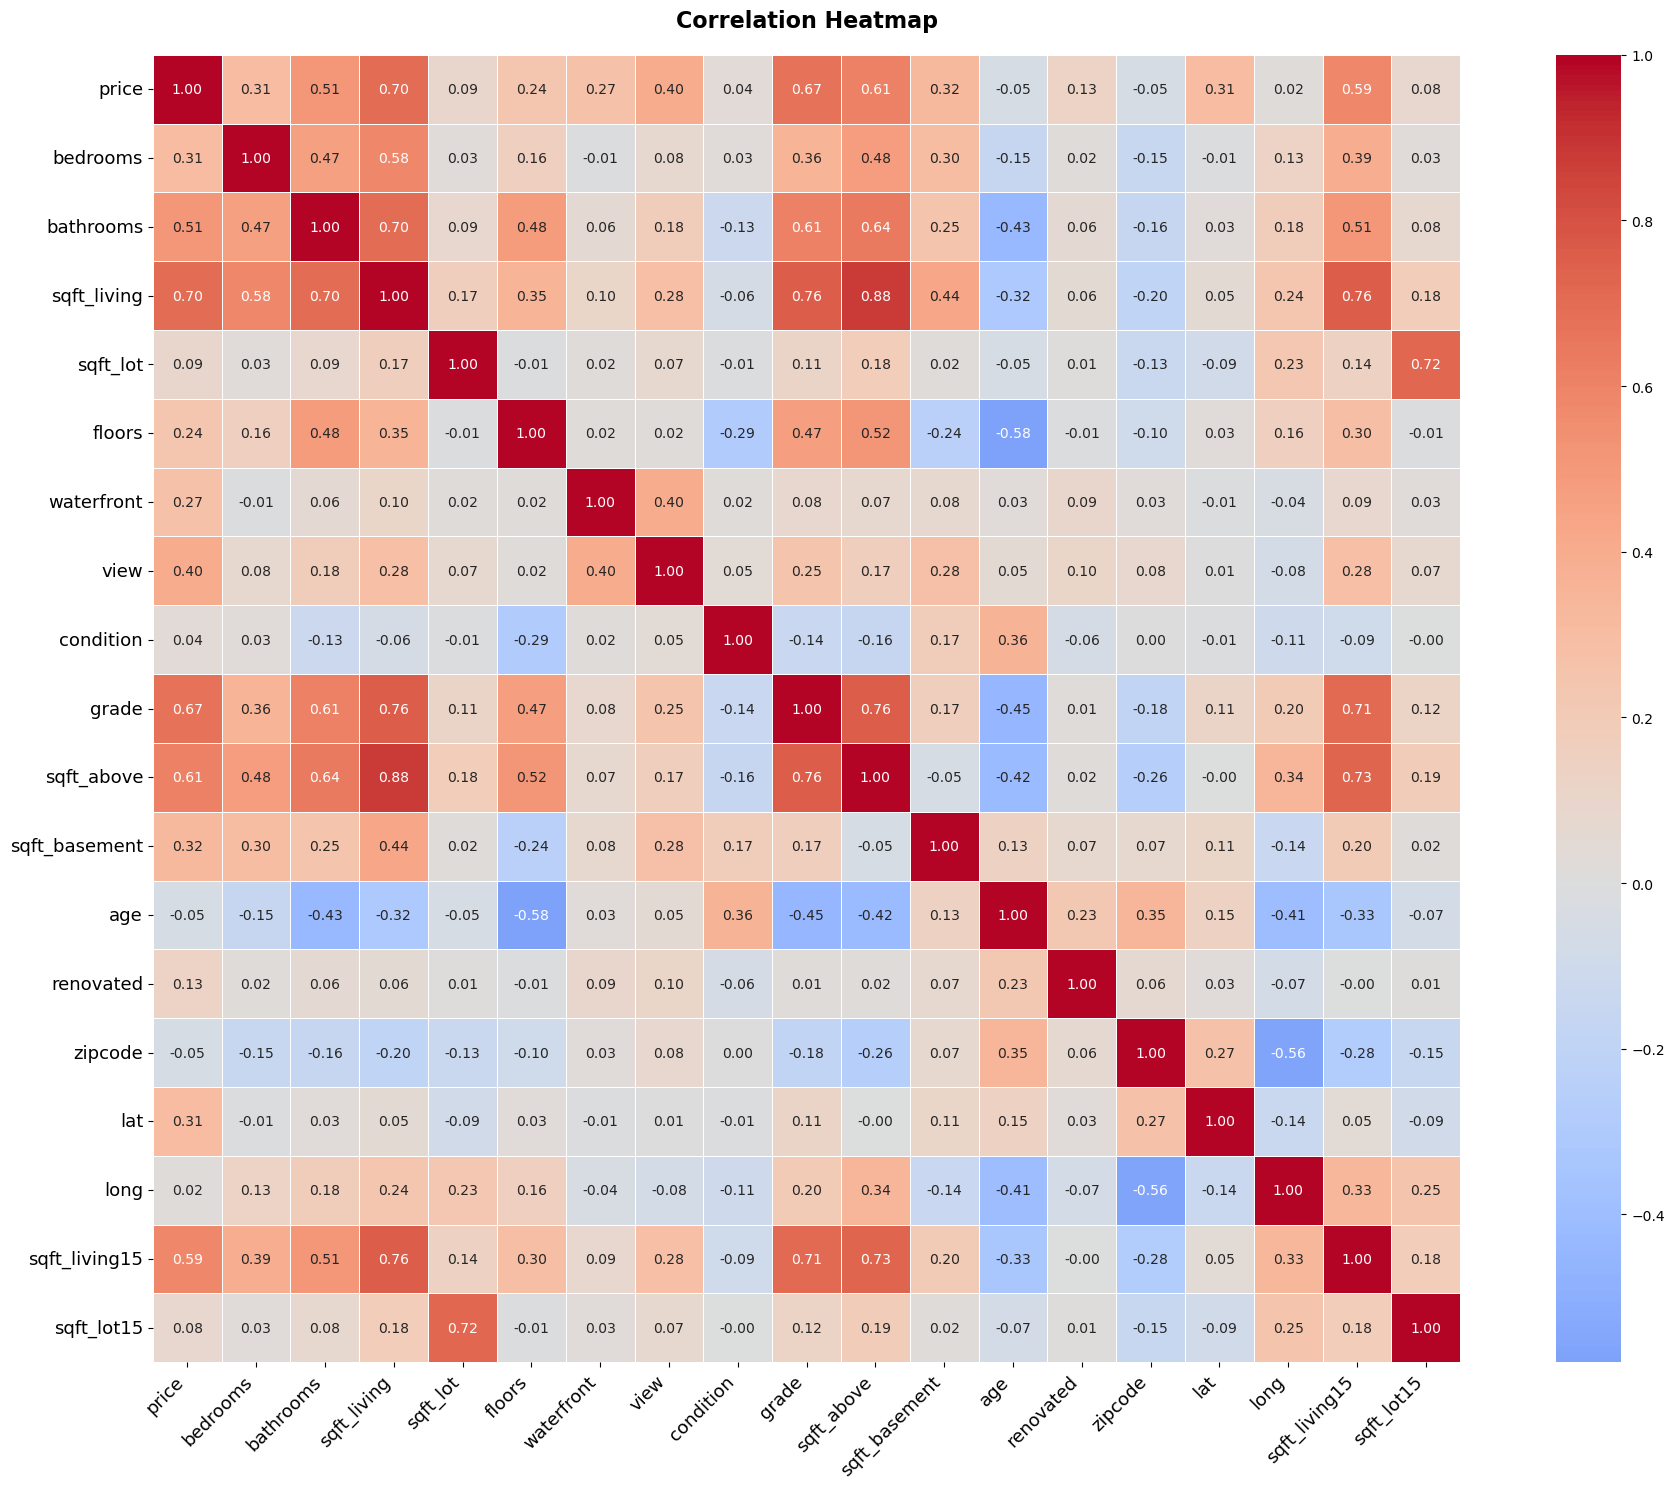

In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    data.corr(),
    annot=True,           # Show correlation numbers
    fmt=".2f",            # Format to 2 decimal places
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=13, rotation=45, ha='right')
plt.yticks(fontsize=13, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

## Visualizing the Correlation with Price

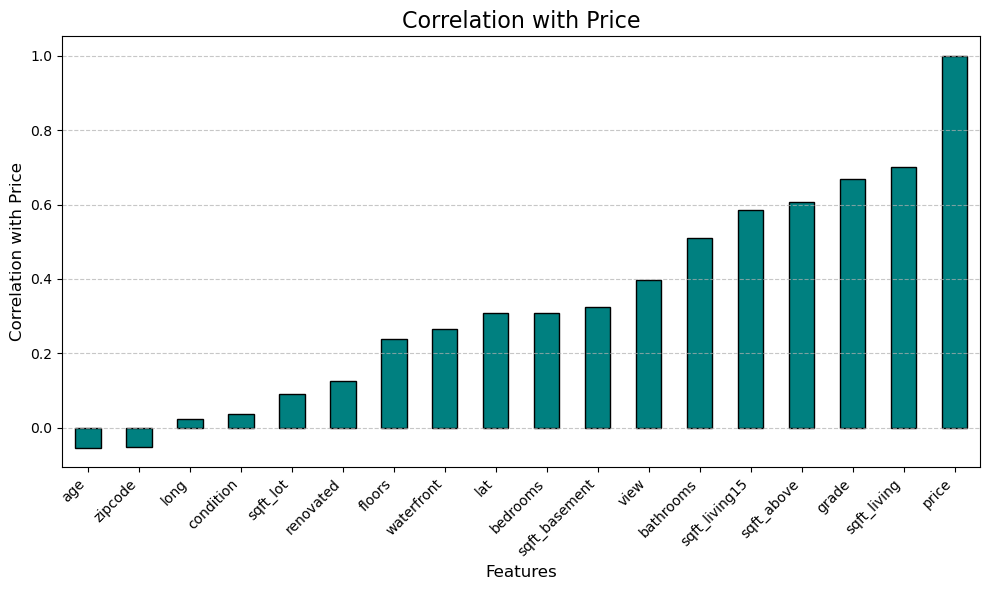

In [21]:
# Plot correlation with good quality
plt.figure(figsize=(10, 6))
data.corr()['price'][:-1].sort_values().plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)

# Add labels and title
plt.title('Correlation with Price', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

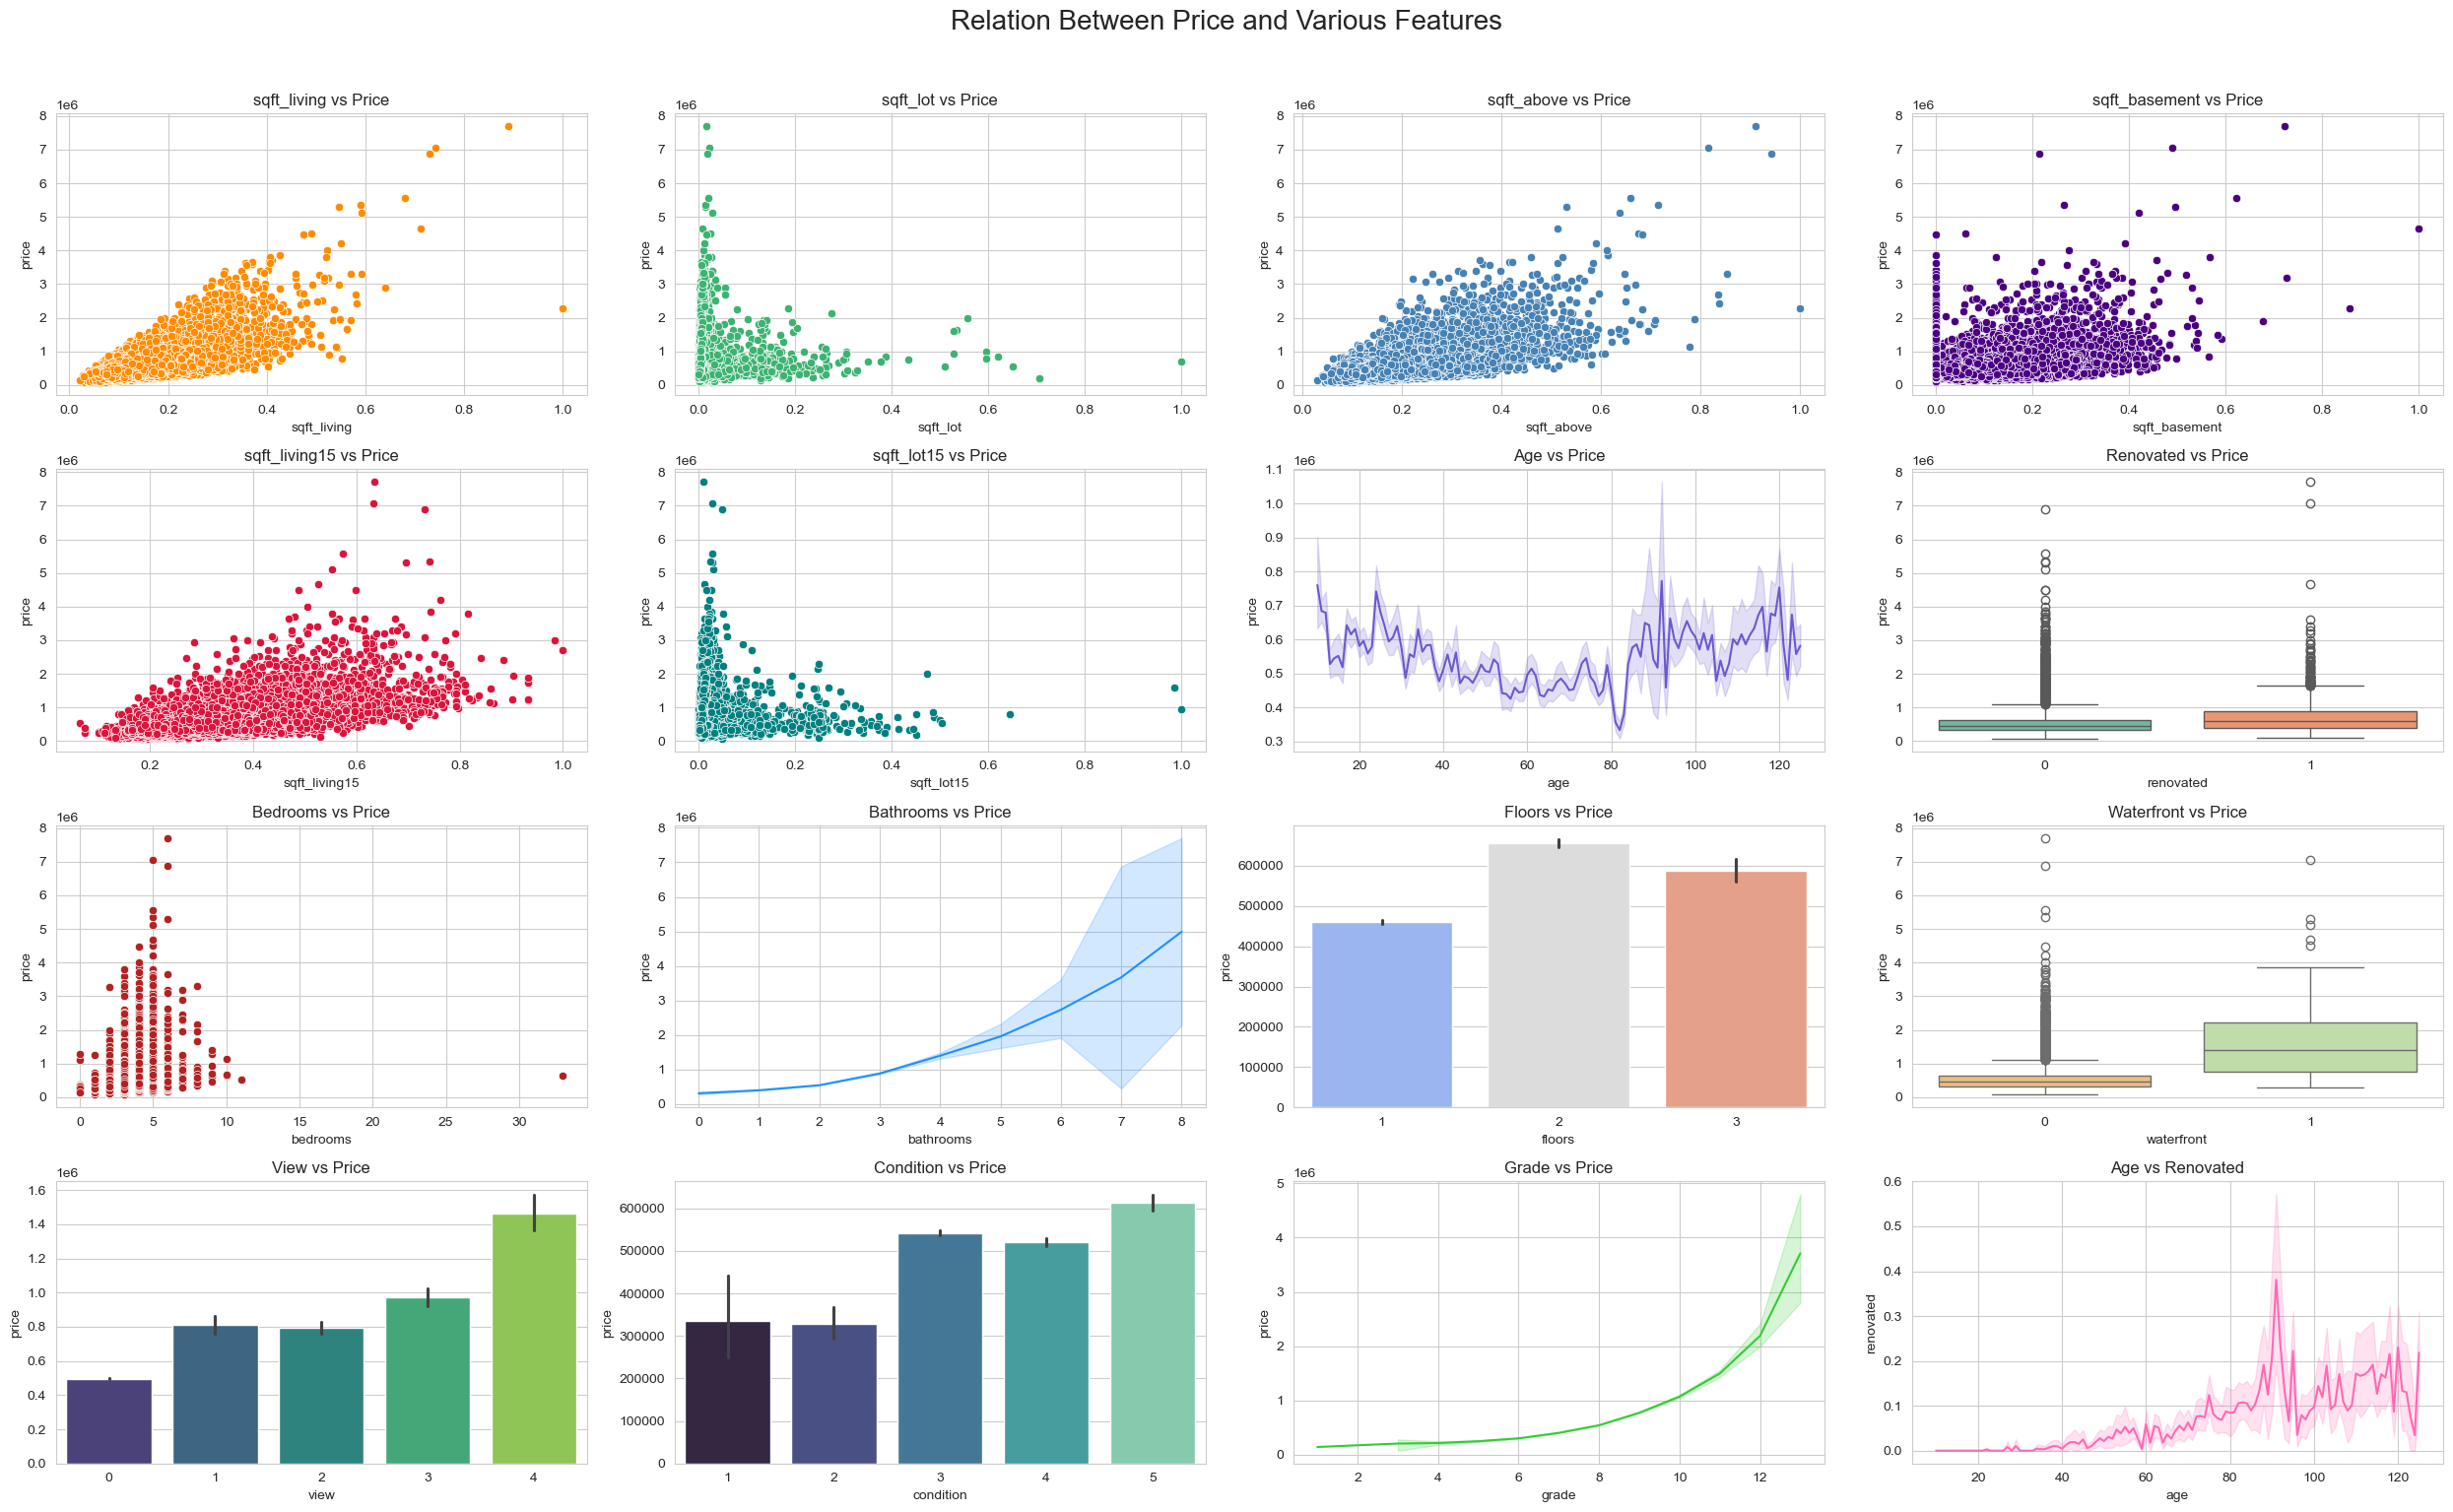

In [22]:
# Set colorful style
sns.set_style("whitegrid")

# Create a colorful figure
fig, ax = plt.subplots(4, 4, figsize=(25, 15))
fig.suptitle('Relation Between Price and Various Features', fontsize=20, y=1.02)

# Row 1
sns.scatterplot(x=data['sqft_living'], y=data['price'], ax=ax[0, 0], color="darkorange")
ax[0, 0].set_title("sqft_living vs Price")

sns.scatterplot(x=data['sqft_lot'], y=data['price'], ax=ax[0, 1], color="mediumseagreen")
ax[0, 1].set_title("sqft_lot vs Price")

sns.scatterplot(x=data['sqft_above'], y=data['price'], ax=ax[0, 2], color="steelblue")
ax[0, 2].set_title("sqft_above vs Price")

sns.scatterplot(x=data['sqft_basement'], y=data['price'], ax=ax[0, 3], color="indigo")
ax[0, 3].set_title("sqft_basement vs Price")

# Row 2
sns.scatterplot(x=data['sqft_living15'], y=data['price'], ax=ax[1, 0], color="crimson")
ax[1, 0].set_title("sqft_living15 vs Price")

sns.scatterplot(x=data['sqft_lot15'], y=data['price'], ax=ax[1, 1], color="teal")
ax[1, 1].set_title("sqft_lot15 vs Price")

sns.lineplot(x=data['age'], y=data['price'], ax=ax[1, 2], color="slateblue")
ax[1, 2].set_title("Age vs Price")

sns.boxplot(x=data['renovated'], y=data['price'], ax=ax[1, 3], palette="Set2")
ax[1, 3].set_title("Renovated vs Price")

# Row 3
sns.scatterplot(x=data['bedrooms'], y=data['price'], ax=ax[2, 0], color="firebrick")
ax[2, 0].set_title("Bedrooms vs Price")

sns.lineplot(x=data['bathrooms'], y=data['price'], ax=ax[2, 1], color="dodgerblue")
ax[2, 1].set_title("Bathrooms vs Price")

sns.barplot(x=data['floors'], y=data['price'], ax=ax[2, 2], palette="coolwarm")
ax[2, 2].set_title("Floors vs Price")

sns.boxplot(x=data['waterfront'], y=data['price'], ax=ax[2, 3], palette="Spectral")
ax[2, 3].set_title("Waterfront vs Price")

# Row 4
sns.barplot(x=data['view'], y=data['price'], ax=ax[3, 0], palette="viridis")
ax[3, 0].set_title("View vs Price")

sns.barplot(x=data['condition'], y=data['price'], ax=ax[3, 1], palette="mako")
ax[3, 1].set_title("Condition vs Price")

sns.lineplot(x=data['grade'], y=data['price'], ax=ax[3, 2], color="limegreen")
ax[3, 2].set_title("Grade vs Price")

sns.lineplot(x=data['age'], y=data['renovated'], ax=ax[3, 3], color="hotpink")
ax[3, 3].set_title("Age vs Renovated")

# Layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Plotting the location of the houses based on longitude and latitude on the map

### adding a new column price_range and categorizing the price into 4 categories

In [25]:
data['price_range'] = pd.cut(data['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])

In [26]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(data[['lat', 'long']].values.tolist()).add_to(map)
map

## Train and Test Split

In [28]:
data.drop(['price_range'],axis=1,inplace=True)

X = data.drop('price',axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

## Model Training

### Using pipeline to combine the transformers and estimators and fit the model

In [48]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [52]:
pipe.fit(X_train,y_train)
print("Score: ", pipe.score(X_test,y_test))

Score:  0.8269769901663909


In [54]:
pipe_pred = pipe.predict(X_test)
print("R2 Score: ", r2_score(y_test,pipe_pred))

R2 Score:  0.8269769901663909


## Ridge Regression

In [57]:
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

#### Training the model

In [61]:
Ridgemodel.fit(X_train,y_train)
print("Ridge Model Score: ", Ridgemodel.score(X_test,y_test))

Ridge Model Score:  0.7123220593275168


#### Testing the model

In [63]:
r_pred = Ridgemodel.predict(X_test)
print("Ridge Model's R2 Score: ", r2_score(y_test,r_pred))

Ridge Model's R2 Score:  0.7123220593275168


## Random Forest Regressor

In [71]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

### Training and Testing the Model

In [80]:
regressor.fit(X_train, y_train)
print("Random Forest's Score: ", regressor.score(X_test, y_test))

rf_pred = regressor.predict(X_test)
print("\nRandom Forest's R2 Score", r2_score(y_test, rf_pred))

Random Forest's Score:  0.8787317187298146

Random Forest's R2 Score 0.8787317187298146


# Model Evaluation

### Distribution plot from the models predictions and the actual values

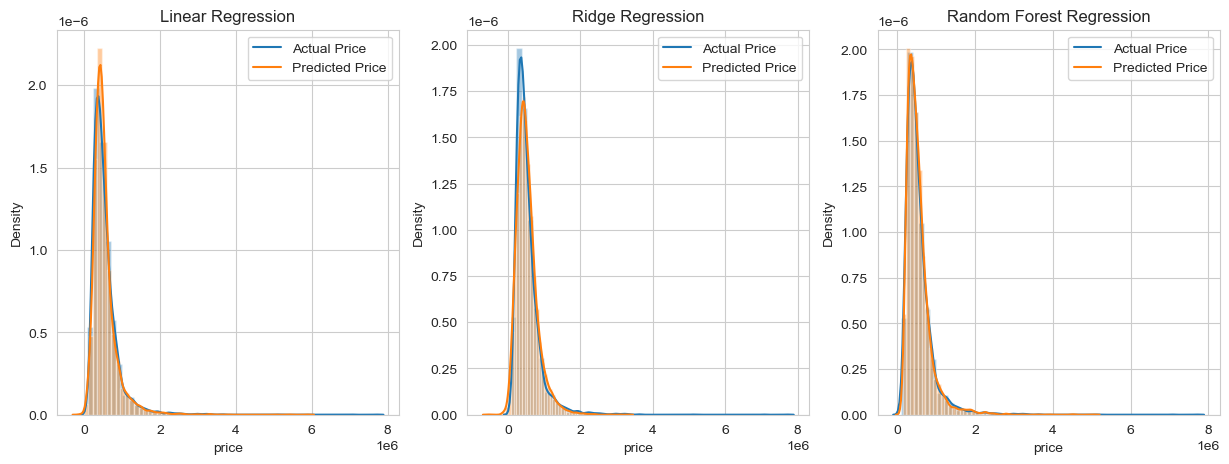

In [95]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(rf_pred,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

## Error Evaluation

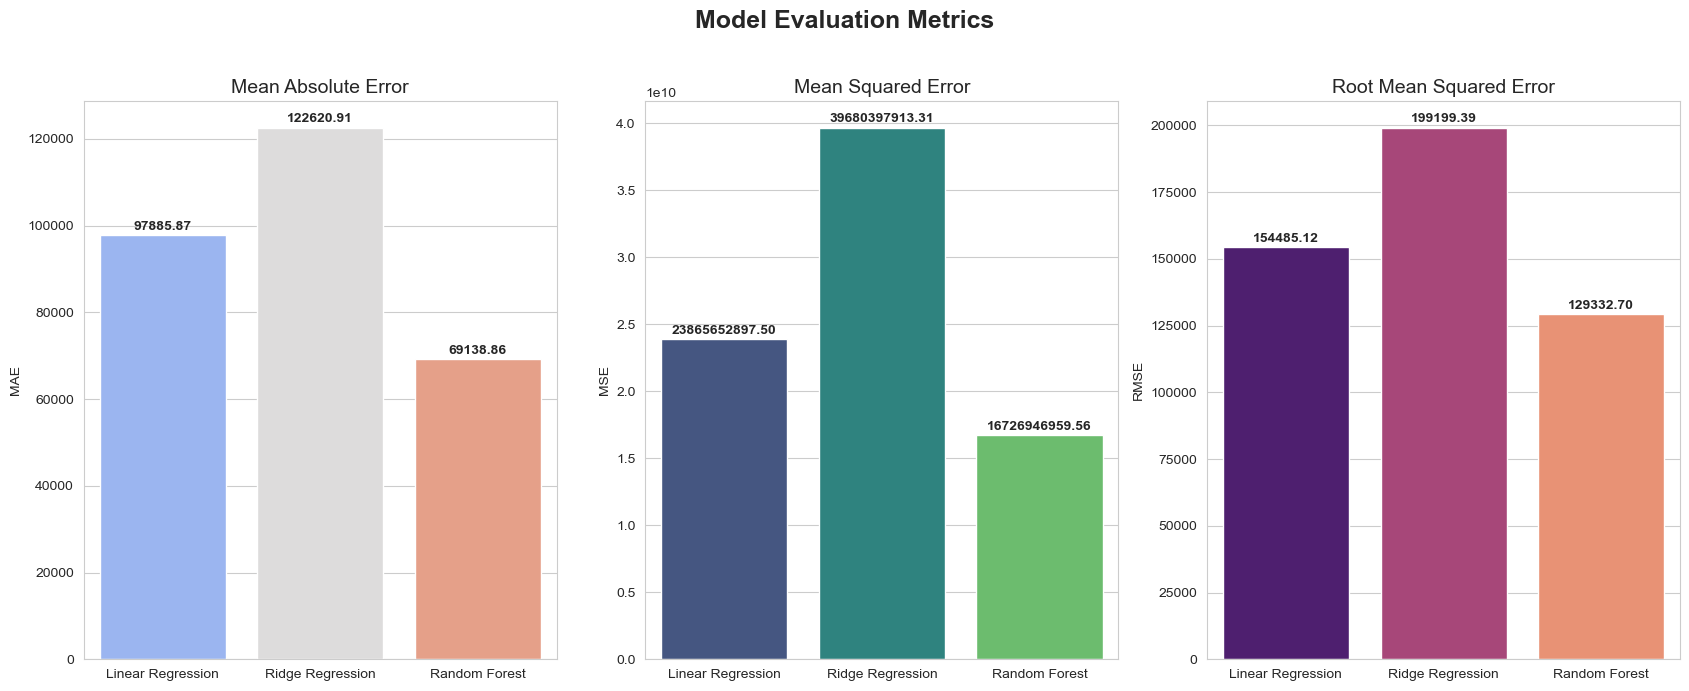

In [103]:
# Define model names
models = ['Linear Regression', 'Ridge Regression', 'Random Forest']

# Compute metrics
mae = [mean_absolute_error(y_test, pipe_pred), 
       mean_absolute_error(y_test, r_pred), 
       mean_absolute_error(y_test, rf_pred)]

mse = [mean_squared_error(y_test, pipe_pred), 
       mean_squared_error(y_test, r_pred), 
       mean_squared_error(y_test, rf_pred)]

rmse = [np.sqrt(m) for m in mse]

# Create the plot
fig, ax = plt.subplots(1, 3, figsize=(17, 7))
fig.suptitle("Model Evaluation Metrics", fontsize=18, fontweight='bold')

# Plot MAE
sns.barplot(x=models, y=mae, palette="coolwarm", ax=ax[0])
ax[0].set_title("Mean Absolute Error", fontsize=14)
ax[0].set_ylabel("MAE")
for i, v in enumerate(mae):
    ax[0].text(i, v + 0.01 * max(mae), f"{v:.2f}", ha='center', fontweight='bold')

# Plot MSE
sns.barplot(x=models, y=mse, palette="viridis", ax=ax[1])
ax[1].set_title("Mean Squared Error", fontsize=14)
ax[1].set_ylabel("MSE")
for i, v in enumerate(mse):
    ax[1].text(i, v + 0.01 * max(mse), f"{v:.2f}", ha='center', fontweight='bold')

# Plot RMSE
sns.barplot(x=models, y=rmse, palette="magma", ax=ax[2])
ax[2].set_title("Root Mean Squared Error", fontsize=14)
ax[2].set_ylabel("RMSE")
for i, v in enumerate(rmse):
    ax[2].text(i, v + 0.01 * max(rmse), f"{v:.2f}", ha='center', fontweight='bold')

# layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

## Accuracy Evaluation

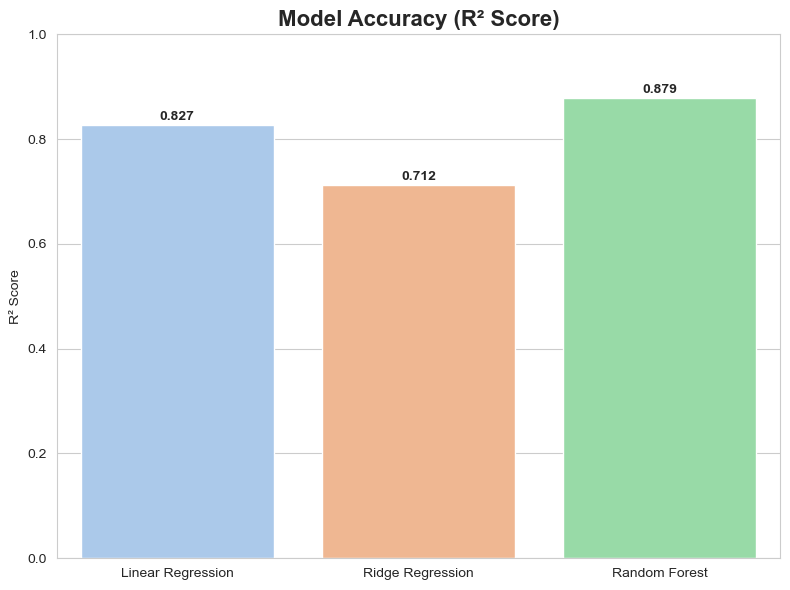

In [107]:
# Model names
models = ['Linear Regression', 'Ridge Regression', 'Random Forest']

# R² scores
r2_scores = [
    metrics.r2_score(y_test, pipe_pred),
    metrics.r2_score(y_test, r_pred),
    metrics.r2_score(y_test, rf_pred)
]

# Plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x=models, y=r2_scores, palette="pastel")

# Add value labels on top of bars
for i, score in enumerate(r2_scores):
    barplot.text(i, score + 0.01, f"{score:.3f}", ha='center', fontweight='bold')

# Titles and labels
plt.title("Model Accuracy (R² Score)", fontsize=16, fontweight='bold')
plt.ylabel("R² Score")
plt.ylim(0, 1)

# Display
plt.tight_layout()
plt.show()

# Predicting the Price of a new house

In [110]:
# Define input features
house_features = {
    "bedrooms": 3,
    "bathrooms": 2,
    "sqft_living": 2000,
    "sqft_lot": 10000,
    "floors": 2,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "grade": 8,
    "sqft_above": 2000,
    "sqft_basement": 0,
    "yr_built": 1990,
    "yr_renovated": 0,
    "zipcode": 98001,
    "lat": 47.5480,
    "long": -121.9836,
    "sqft_living15": 2000,
    "sqft_lot15": 10000
}

input_data = [[
    house_features["bedrooms"],
    house_features["bathrooms"],
    house_features["sqft_living"],
    house_features["sqft_lot"],
    house_features["floors"],
    house_features["waterfront"],
    house_features["view"],
    house_features["condition"],
    house_features["grade"],
    house_features["sqft_above"],
    house_features["sqft_basement"],
    house_features["yr_built"],
    house_features["yr_renovated"],
    house_features["zipcode"],
    house_features["lat"],
    house_features["long"],
    house_features["sqft_living15"],
    house_features["sqft_lot15"]
]]

# Predict the price
predicted_price = regressor.predict(input_data)[0]
print(f"Estimated House Price: ${predicted_price:,.2f}")

Estimated House Price: $1,078,099.55


# Final Conclusion

From the analysis, we can see that the Random Forest Regression model performed better than the Ridge Regression model and Polynomial Regression model. 

During the EDA process, we found out that the location of the house is a very important factor in determining the price of the house, since houese with similar area and other features can have different prices depending on the location of the house. 

The location of the houses has been plotted on the map using the longitude and latitude values which makesrole of location in determining the price of the house more clear.